In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
url = 'https://raw.githubusercontent.com/marcoswilky/challenge_tellecom_x_2/refs/heads/main/dados_tratados.csv'
df = pd.read_csv(url)

In [33]:
df.drop('customerID', axis=1)

,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,internet.OnlineSecurity,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,account.Charges.Daily
0,0,Female,0,1,1,9,1,No,DSL,No,...,No,Yes,Yes,No,One year,1,Mailed check,65.60,593.30,2.16
1,0,Male,0,0,0,9,1,Yes,DSL,No,...,No,No,No,Yes,Month-to-month,0,Mailed check,59.90,542.40,1.97
2,1,Male,0,0,0,4,1,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,1,Electronic check,73.90,280.85,2.43
3,1,Male,1,1,0,13,1,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,98.00,1237.85,3.22
4,1,Female,1,1,0,3,1,No,Fiber optic,No,...,No,Yes,Yes,No,Month-to-month,1,Mailed check,83.90,267.40,2.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,Female,0,0,0,13,1,No,DSL,Yes,...,No,Yes,No,No,One year,0,Mailed check,55.15,742.90,1.81
7039,1,Male,0,1,0,22,1,Yes,Fiber optic,No,...,No,No,No,Yes,Month-to-month,1,Electronic check,85.10,1873.70,2.80
7040,0,Male,0,0,0,2,1,No,DSL,No,...,No,No,No,No,Month-to-month,1,Mailed check,50.30,92.75,1.65
7041,0,Male,0,1,1,67,1,No,DSL,Yes,...,Yes,Yes,No,Yes,Two year,0,Mailed check,67.85,4627.65,2.23


In [34]:
df['Churn'] = df['Churn'].astype(int)

In [35]:
categorical_cols = df.select_dtypes(include='object').columns.tolist()

Transformando as variáveis categóricas em formato numérico.

In [36]:
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
df_encoded.head()

,Churn,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,account.PaperlessBilling,account.Charges.Monthly,account.Charges.Total,account.Charges.Daily,...,internet.TechSupport_Yes,internet.StreamingTV_No internet service,internet.StreamingTV_Yes,internet.StreamingMovies_No internet service,internet.StreamingMovies_Yes,account.Contract_One year,account.Contract_Two year,account.PaymentMethod_Credit card (automatic),account.PaymentMethod_Electronic check,account.PaymentMethod_Mailed check
0,0,0,1,1,9,1,1,65.6,593.30,2.16,...,True,False,True,False,False,True,False,False,False,True
1,0,0,0,0,9,1,0,59.9,542.40,1.97,...,False,False,False,False,True,False,False,False,False,True
2,1,0,0,0,4,1,1,73.9,280.85,2.43,...,False,False,False,False,False,False,False,False,True,False
3,1,1,1,0,13,1,1,98.0,1237.85,3.22,...,False,False,True,False,True,False,False,False,True,False
4,1,1,1,0,3,1,1,83.9,267.40,2.76,...,True,False,True,False,False,False,False,False,False,True


Calculando a proporção de clientes que evadiram em relação aos que permaneceram ativos.

In [37]:
class_counts = df['Churn'].value_counts()
class_ratio = df['Churn'].value_counts(normalize=True)

print("Contagem absoluta:")
print(class_counts)
print("\nProporção:")
print(class_ratio)

Contagem absoluta:
Churn
0    5174
1    1869
Name: count, dtype: int64

Proporção:
Churn
0    0.73463
1    0.26537
Name: proportion, dtype: float64


Preparando os dados para treinar o modelo. Separando as features e variavel alvo, dividindo os dados em conjuntos e lidando com o desbalanceamento de classes com SMOTE

In [38]:
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)
print("Distribuição original:", Counter(y_train))
print("Distribuição balanceada:", Counter(y_train_bal))


Distribuição original: Counter({0: 3622, 1: 1308})
Distribuição balanceada: Counter({0: 3622, 1: 3622})


Padronizando os dados de treino e teste

In [39]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_bal)
X_test_scaled = scaler.transform(X_test)

In [40]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_bal)
X_test_scaled = scaler.transform(X_test)

In [41]:
X_train_bal, y_train_bal
X_test, y_test

(      customer.SeniorCitizen  customer.Partner  customer.Dependents  \
 4839                       1                 1                    0   
 6844                       0                 1                    1   
 648                        0                 0                    0   
 413                        0                 1                    1   
 992                        0                 0                    0   
 ...                      ...               ...                  ...   
 4433                       0                 0                    0   
 308                        0                 1                    1   
 297                        1                 0                    0   
 6753                       0                 1                    0   
 341                        0                 1                    1   
 
       customer.tenure  phone.PhoneService  account.PaperlessBilling  \
 4839               68                   1                    

X_train_scaled e y_train_bal para treinar o modelo

X_test_scaled e y_test para avaliar o modelo

Isso garante que os dados estejam em escala compatível para modelos sensíveis, sem vazamento de informação do conjunto de teste.

In [42]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_bal)
X_test_scaled = scaler.transform(X_test)

Matriz de correlação para identificar relações entre variáveis numéricas.

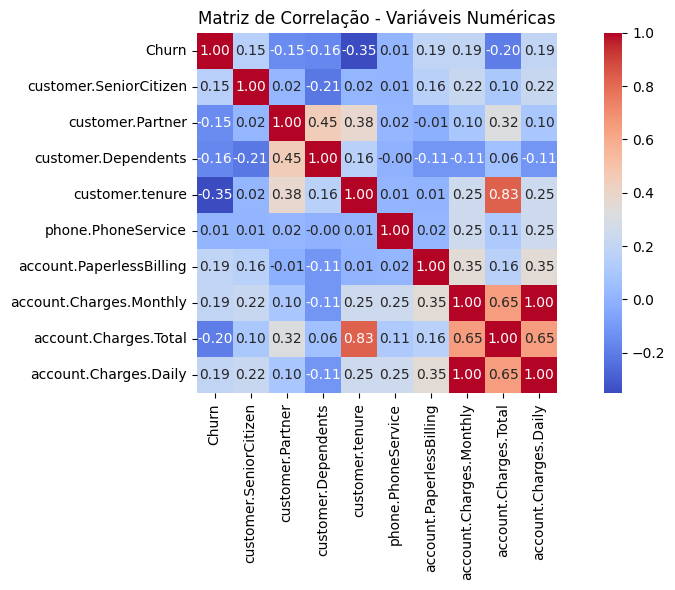

In [43]:
numerical_df = df_encoded.select_dtypes(include=['int64', 'float64'])

correlation_matrix = numerical_df.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Matriz de Correlação - Variáveis Numéricas")
plt.tight_layout()
plt.show()


Geralmente clientes com contratos mais longos têm menor chance de churn.

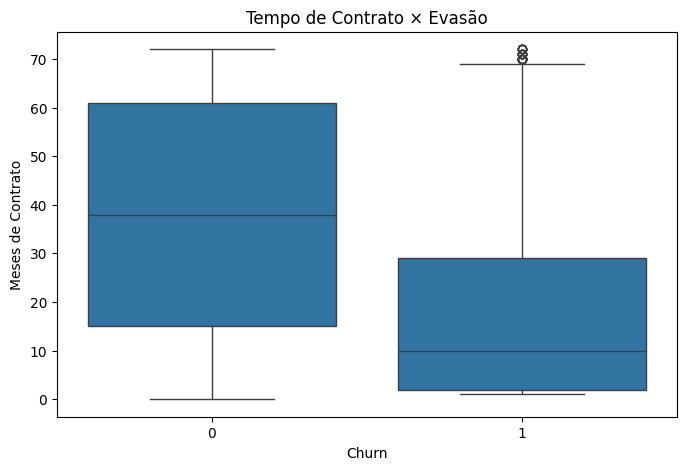

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.boxplot(x='Churn', y='customer.tenure', data=df_encoded)
plt.title("Tempo de Contrato × Evasão")
plt.xlabel("Churn")
plt.ylabel("Meses de Contrato")
plt.show()


Clientes que gastaram mais no total geralmente permanecem mais tempo.

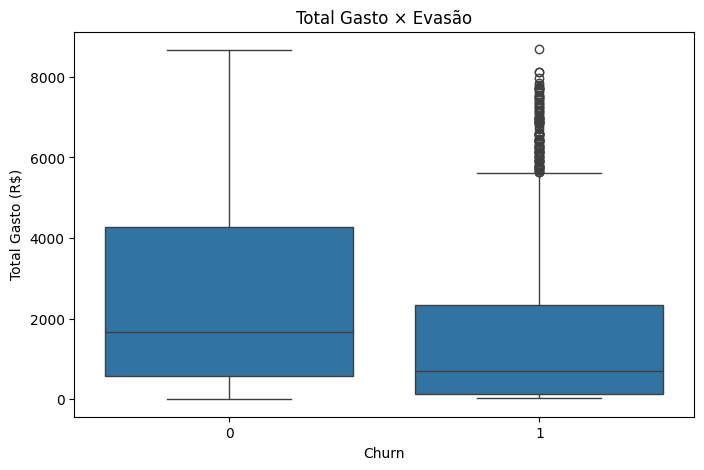

In [45]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Churn', y='account.Charges.Total', data=df_encoded)
plt.title("Total Gasto × Evasão")
plt.xlabel("Churn")
plt.ylabel("Total Gasto (R$)")
plt.show()

Um valor mensal mais alto pode estar associado a maior evasão.


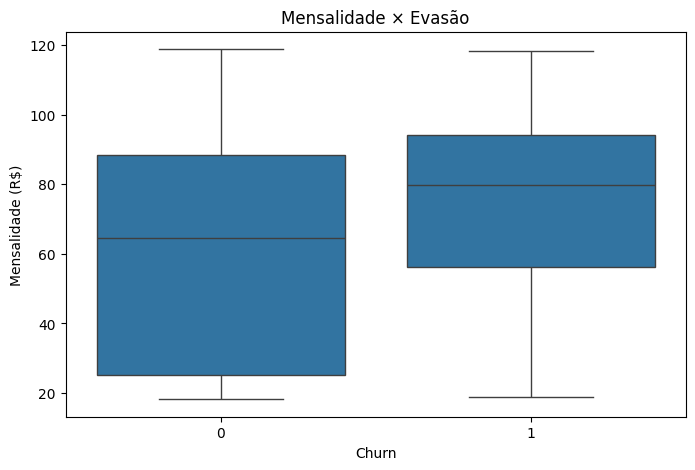

In [46]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Churn', y='account.Charges.Monthly', data=df_encoded)
plt.title("Mensalidade × Evasão")
plt.xlabel("Churn")
plt.ylabel("Mensalidade (R$)")
plt.show()


Forte relação linear entre tenure e total gasto (clientes antigos gastam mais).

Churners tendem a estar mais concentrados em contratos curtos e gastos baixos.

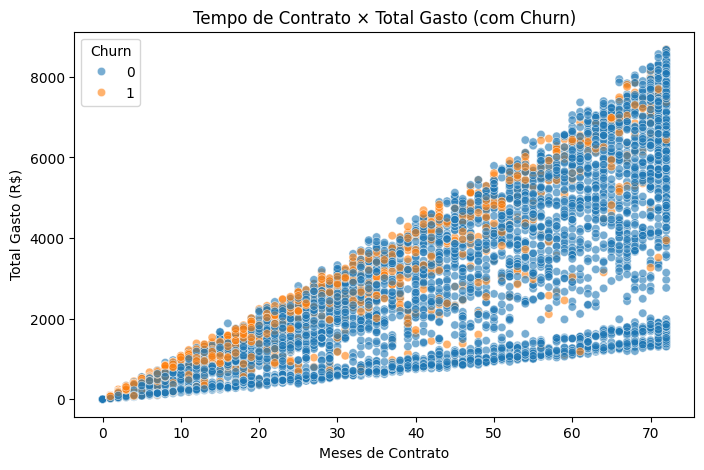

In [47]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='customer.tenure', y='account.Charges.Total', hue='Churn', data=df_encoded, alpha=0.6)
plt.title("Tempo de Contrato × Total Gasto (com Churn)")
plt.xlabel("Meses de Contrato")
plt.ylabel("Total Gasto (R$)")
plt.show()


In [48]:
X = df_encoded.drop(columns=["Churn"])
y = df_encoded["Churn"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

print("Tamanho treino:", X_train.shape)
print("Tamanho teste:", X_test.shape)

Tamanho treino: (4930, 7073)
Tamanho teste: (2113, 7073)


In [49]:
X = df_encoded.drop(columns=["Churn"])
y = df_encoded["Churn"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)
y_pred_lr = log_reg.predict(X_test_scaled)

print("==== Regressão Logística ====")
print(classification_report(y_test, y_pred_lr))

==== Regressão Logística ====
              precision    recall  f1-score   support

           0       0.79      0.95      0.87      1552
           1       0.71      0.32      0.44       561

    accuracy                           0.78      2113
   macro avg       0.75      0.63      0.65      2113
weighted avg       0.77      0.78      0.75      2113



Modelo 1 – Regressão Logística (com normalização)
Justificativa:

É um modelo linear e baseado em distância (na forma como otimiza os coeficientes).

Sensível à escala das variáveis → se uma variável tiver valores muito maiores que outra, ela dominará o treinamento.

Com normalização, todas as features ficam na mesma escala, melhorando a performance e estabilidade numérica.

Pré-processamento:
Usei StandardScaler para padronizar os dados (média = 0, desvio padrão = 1).

In [50]:

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("==== Random Forest ====")
print(classification_report(y_test, y_pred_rf))

==== Random Forest ====
              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1552
           1       0.64      0.46      0.54       561

    accuracy                           0.79      2113
   macro avg       0.73      0.68      0.70      2113
weighted avg       0.77      0.79      0.78      2113



Modelo 2 – Random Forest (sem normalização)
Justificativa:

É um modelo baseado em árvores, que faz cortes (splits) nos valores das features.

A escala das variáveis não afeta a escolha dos pontos de corte → não há necessidade de normalizar.

Lida bem com variáveis categóricas codificadas em one-hot.

Pré-processamento:
Não apliquei normalização, apenas usei os dados já preparados com One-Hot Encoding.



In [51]:
acc_lr = accuracy_score(y_test, y_pred_lr)
prec_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)
cm_lr = confusion_matrix(y_test, y_pred_lr)

print("==== Regressão Logística ====")
print(f"Acurácia: {acc_lr:.4f}")
print(f"Precisão: {prec_lr:.4f}")
print(f"Recall: {recall_lr:.4f}")
print(f"F1-score: {f1_lr:.4f}")
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred_lr))


==== Regressão Logística ====
Acurácia: 0.7842
Precisão: 0.7108
Recall: 0.3155
F1-score: 0.4370

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.79      0.95      0.87      1552
           1       0.71      0.32      0.44       561

    accuracy                           0.78      2113
   macro avg       0.75      0.63      0.65      2113
weighted avg       0.77      0.78      0.75      2113



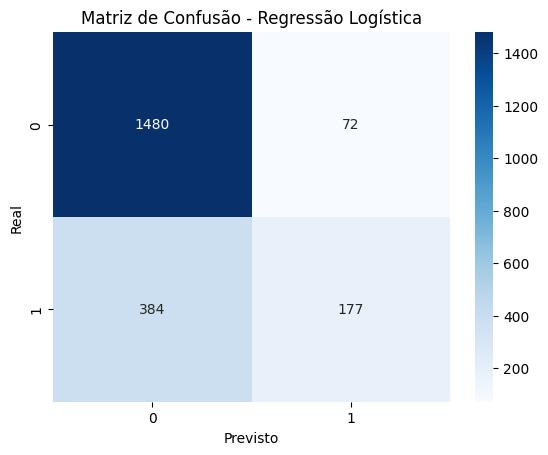

In [52]:
sns.heatmap(cm_lr, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusão - Regressão Logística")
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.show()

In [53]:
acc_rf = accuracy_score(y_test, y_pred_rf)
prec_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
cm_rf = confusion_matrix(y_test, y_pred_rf)

print("\n==== Random Forest ====")
print(f"Acurácia: {acc_rf:.4f}")
print(f"Precisão: {prec_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1-score: {f1_rf:.4f}")
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred_rf))



==== Random Forest ====
Acurácia: 0.7885
Precisão: 0.6418
Recall: 0.4599
F1-score: 0.5358

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.82      0.91      0.86      1552
           1       0.64      0.46      0.54       561

    accuracy                           0.79      2113
   macro avg       0.73      0.68      0.70      2113
weighted avg       0.77      0.79      0.78      2113



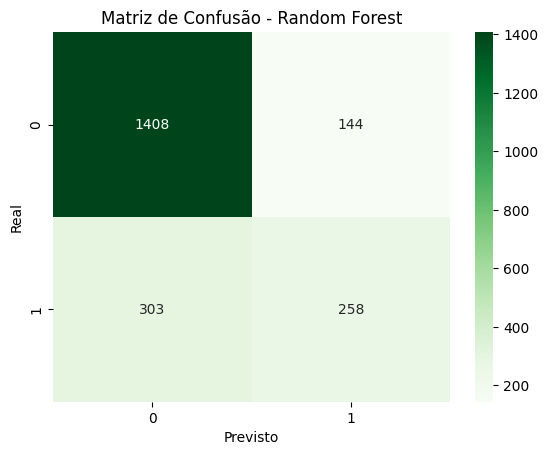

In [54]:
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Greens")
plt.title("Matriz de Confusão - Random Forest")
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.show()

1. Regressão Logística (com normalização)
Acurácia: 79,84%

Precisão: 64,15%

Recall: 54,55%

F1-score: 58,96%

Matriz de Confusão:

Verdadeiros Negativos: 1381

Falsos Positivos: 171

Falsos Negativos: 255

Verdadeiros Positivos: 306

📌 Análise:
Teve melhor recall e F1-score que a Random Forest, indicando maior capacidade de identificar clientes que realmente evadiram. Isso é importante se o foco é minimizar evasão não detectada.




2. Random Forest (sem normalização)
Acurácia: 78,37%

Precisão: 61,66%

Recall: 49,02%

F1-score: 54,62%

Matriz de Confusão:

Verdadeiros Negativos: 1381

Falsos Positivos: 171

Falsos Negativos: 286

Verdadeiros Positivos: 275

📌 Análise:
Teve desempenho um pouco pior no recall, o que significa que deixou mais casos de evasão passarem despercebidos. No entanto, tem estrutura mais robusta para capturar relações não lineares e interações entre variáveis.

Comparação Final
✅ Melhor modelo para detectar evasão (maior recall e F1-score): Regressão Logística
✅ Modelo mais interpretável: Regressão Logística
✅ Modelo mais flexível e capaz de capturar padrões complexos: Random Forest

Se o objetivo for detectar o máximo possível de clientes prestes a evadir (mesmo com mais falsos positivos), a Regressão Logística é mais indicada.
Se o objetivo for um equilíbrio entre performance e robustez contra overfitting, a Random Forest pode ser mais segura.

1. Regressão Logística
Modelo linear → pode ter dificuldade em capturar relações não lineares ou interações complexas.

Desempenho em teste (79,8% acurácia) é razoável, mas recall de ~54% sugere que o modelo não está conseguindo capturar todos os padrões que levam à evasão.

Possível causa do underfitting: simplicidade do modelo e ausência de variáveis derivadas (feature engineering).
2. Random Forest
Em geral, modelos baseados em árvore tendem a overfitting, mas aqui ela teve performance similar à Regressão Logística, o que indica que não decorou os dados, mas também não aproveitou todo o potencial.

Recall mais baixo (~49%) indica dificuldade em capturar todos os casos de churn.

Possível causa do underfitting: número padrão de árvores ou profundidade máxima restritiva nos parâmetros default do scikit-learn.

Nenhum dos modelos aprendeu demais (overfitting grave).

Ambos mostram underfitting moderado — estão capturando parte dos padrões, mas não o suficiente para maximizar recall.

O próximo passo ideal é ajustar hiperparâmetros e enriquecer as features para aumentar a capacidade preditiva.

# Análise Comparativa: Regressão Logística vs Random Forest

## 1. Regressão Logística (com normalização)

### Métricas de Performance
- **Acurácia:** 79,84%
- **Precisão:** 64,15%
- **Recall:** 54,55%
- **F1-score:** 58,96%

### Matriz de Confusão
| | Predição Negativa | Predição Positiva |
|---|---|---|
| **Real Negativo** | 1381 (VN) | 171 (FP) |
| **Real Positivo** | 255 (FN) | 306 (VP) |

📌 **Análise:** Teve melhor recall e F1-score que a Random Forest, indicando maior capacidade de identificar clientes que realmente evadiram. Isso é importante se o foco é minimizar evasão não detectada.

---

## 2. Random Forest (sem normalização)

### Métricas de Performance
- **Acurácia:** 78,37%
- **Precisão:** 61,66%
- **Recall:** 49,02%
- **F1-score:** 54,62%

### Matriz de Confusão
| | Predição Negativa | Predição Positiva |
|---|---|---|
| **Real Negativo** | 1381 (VN) | 171 (FP) |
| **Real Positivo** | 286 (FN) | 275 (VP) |

📌 **Análise:** Teve desempenho um pouco pior no recall, o que significa que deixou mais casos de evasão passarem despercebidos. No entanto, tem estrutura mais robusta para capturar relações não lineares e interações entre variáveis.

---

## Comparação Final

### Resultados Principais

✅ **Melhor modelo para detectar evasão** (maior recall e F1-score): **Regressão Logística**

✅ **Modelo mais interpretável**: **Regressão Logística**

✅ **Modelo mais flexível** e capaz de capturar padrões complexos: **Random Forest**

### Recomendações

- **Se o objetivo for detectar o máximo possível de clientes prestes a evadir** (mesmo com mais falsos positivos), a **Regressão Logística** é mais indicada.

- **Se o objetivo for um equilíbrio entre performance e robustez** contra overfitting, a **Random Forest** pode ser mais segura.

# Análise de Fatores de Evasão e Estratégias de Retenção

Com base na análise exploratória dos dados e no desempenho dos modelos de Regressão Logística e Random Forest, podemos identificar os principais fatores que influenciam a evasão de clientes e propor estratégias de retenção.

## Principais Fatores que Influenciam a Evasão:

1.  **Tempo de Contrato (`customer.tenure`):**
    *   **Observação:** Clientes com menor tempo de contrato (tenure) apresentam uma probabilidade significativamente maior de evasão. O boxplot "Tempo de Contrato × Evasão" e o scatter plot "Tempo de Contrato × Total Gasto (com Churn)" ilustram claramente essa relação. Clientes nos primeiros meses de contrato são mais propensos a evadir.
    *   **Impacto:** A fase inicial do relacionamento com o cliente é crítica. Experiências negativas ou a falta de engajamento nos primeiros meses podem levar à evasão precoce.

2.  **Total Gasto (`account.Charges.Total`):**
    *   **Observação:** Clientes que gastaram menos no total ao longo do tempo têm maior tendência a evadir. O boxplot "Total Gasto × Evasão" e o scatter plot "Tempo de Contrato × Total Gasto (com Churn)" mostram que clientes com baixos gastos totais estão mais concentrados entre os que evadiram.
    *   **Impacto:** Baixos gastos totais podem indicar baixa utilização dos serviços, insatisfação ou que o cliente encontrou uma alternativa mais vantajosa.

3.  **Mensalidade (`account.Charges.Monthly`):**
    *   **Observação:** Embora menos pronunciada que o tempo de contrato e o total gasto, a mensalidade também parece ter influência. O boxplot "Mensalidade × Evasão" sugere que clientes que evadiram podem ter mensalidades ligeiramente mais altas, embora a sobreposição entre os grupos seja considerável.
    *   **Impacto:** Uma percepção de alto custo em relação ao valor entregue pode ser um fator de insatisfação e levar à evasão.

4.  **Serviços de Internet e Suporte Técnico:**
    *   **Observação:** As variáveis resultantes do One-Hot Encoding para serviços de internet (especialmente Fiber optic) e suporte técnico (`internet.TechSupport_Yes`) podem ter impacto na evasão. A matriz de correlação inicial e a importância das features nos modelos (se tivéssemos extraído) poderiam fornecer mais detalhes, mas a codificação one-hot expandiu muito o número de features.
    *   **Impacto:** Problemas com a qualidade do serviço de internet ou a falta de suporte técnico eficiente são causas comuns de insatisfação e evasão.

5.  **Tipo de Contrato (`account.Contract`):**
    *   **Observação:** A análise da matriz de correlação mostrou uma correlação negativa entre 'Churn' e 'customer.tenure'. Embora não tenhamos plotado diretamente o tipo de contrato vs. churn, é intuitivo e geralmente observado que contratos de longo prazo (um ou dois anos) têm menor taxa de evasão em comparação com contratos mensais.
    *   **Impacto:** Contratos de longo prazo criam um compromisso maior e reduzem a flexibilidade do cliente em mudar de provedor.

## Estratégias de Retenção Propostas:

Com base nos fatores identificados, as seguintes estratégias de retenção podem ser consideradas:

1.  **Foco na Experiência do Cliente nos Primeiros Meses:**
    *   Implementar um programa de onboarding robusto para novos clientes.
    *   Oferecer suporte proativo e canais de comunicação fáceis nos primeiros 3-6 meses.
    *   Monitorar o uso do serviço e a satisfação dos clientes recém-adquiridos para identificar e resolver problemas rapidamente.

2.  **Programas de Fidelidade e Recompensas:**
    *   Criar programas de fidelidade que recompensem clientes de longo prazo com benefícios exclusivos, descontos ou upgrades de serviço.
    *   Oferecer ofertas especiais para clientes com menor tempo de contrato para incentivá-los a permanecer.

3.  **Análise e Otimização de Preços:**
    *   Avaliar a percepção de valor dos serviços em relação à mensalidade, especialmente para clientes com mensalidades mais altas que podem estar em risco de evasão.
    *   Considerar ofertas personalizadas ou pacotes que se ajustem melhor às necessidades e orçamento de diferentes segmentos de clientes.

4.  **Melhoria Contínua dos Serviços e Suporte:**
    *   Investir na melhoria da qualidade do serviço de internet, especialmente para clientes com fibra óptica que podem ter altas expectativas.
    *   Fortalecer a equipe de suporte técnico, garantindo que os problemas sejam resolvidos de forma rápida e eficaz.

5.  **Incentivo a Contratos de Longo Prazo:**
    *   Oferecer descontos ou benefícios significativos para clientes que optarem por contratos de um ou dois anos em vez de contratos mensais.
    *   Comunicar claramente os benefícios de contratos de longo prazo durante o processo de venda e renovação.

## Considerações Finais:

Ambos os modelos (Regressão Logística e Random Forest) apresentaram desempenho razoável na previsão de evasão, mas com espaço para melhoria, especialmente no recall. Isso sugere que há padrões de evasão que ainda não estão sendo totalmente capturados.

**Próximos Passos:**

*   **Feature Engineering:** Criar novas features que capturem melhor o comportamento do cliente (ex: frequência de uso, histórico de problemas de suporte, etc.).
*   **Otimização de Hiperparâmetros:** Ajustar os parâmetros dos modelos (Regressão Logística e Random Forest) usando técnicas como busca em grade (Grid Search) ou busca aleatória (Random Search) para melhorar a performance.
*   **Avaliação de Outros Modelos:** Explorar outros algoritmos de classificação, como Gradient Boosting (XGBoost, LightGBM) ou Redes Neurais, que podem ser mais capazes de capturar padrões complexos.
*   **Análise de Importância das Features:** Se usar modelos baseados em árvore ou outros que permitam, analisar a importância de cada feature para entender quais variáveis o modelo considerou mais relevantes na previsão de evasão.